In [1]:
# import subprocess

# packages = ['geemap', 'geopandas',
#             'shapely', 'requests', 
#             'osgeo', 'rasterio', 'numpy',
#             'sklearn', 'fiona', 'pyproj',
#             'matplotlib', 'pandas',
#             'seaborn','geocube', 'os']

# for package in packages:
#     try:
#         __import__(package)
#     except ImportError:
#         subprocess.check_call(['pip', 'install', package])

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import fiona

D:\NBS_work\NBS_Data_Validation\env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
# specified the UTM crs for the Area of Intrest (AOI)
projected_crs = 32721

In [4]:
# load the sampling points set data
sampling_points = gpd.read_file('matto_grosso_data/sampling_points.shp')
sampling_points.rename(columns={'Average':'LST'},inplace=True)
sampling_points.head()

,ID,SOC_t_ha,Slope,Rainfall,NDVI,landuse,elevation,BSI,LST,Estimated,geometry
0,0,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
1,1,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
2,2,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
3,3,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
4,4,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)


In [5]:
sampling_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         2607 non-null   int64   
 1   SOC_t_ha   2607 non-null   float64 
 2   Slope      2607 non-null   float64 
 3   Rainfall   2607 non-null   float64 
 4   NDVI       2607 non-null   float64 
 5   landuse    2607 non-null   float64 
 6   elevation  2607 non-null   float64 
 7   BSI        2607 non-null   float64 
 8   LST        2607 non-null   float64 
 9   Estimated  2607 non-null   float64 
 10  geometry   2607 non-null   geometry
dtypes: float64(9), geometry(1), int64(1)
memory usage: 224.2 KB


In [6]:
sampling_points.describe()

,ID,SOC_t_ha,Slope,Rainfall,NDVI,landuse,elevation,BSI,LST,Estimated
count,2607.0000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000
mean,1303.0000,100.741414,-121.705257,-544.418788,-574.737970,24.157643,303.430074,-575.384711,-264.476784,100.741413
std,752.7204,28.475149,1101.305969,2278.102856,2329.022665,17.275090,134.349149,2328.862836,2345.559706,23.962636
min,0.0000,0.000000,-9999.000000,-9999.000000,-9999.000000,10.000000,97.000000,-9999.000000,-9999.000000,13.046369
25%,651.5000,87.181000,0.317715,2.980180,0.466668,10.000000,211.000000,-0.281724,296.350000,93.399354
50%,1303.0000,106.773000,0.696692,4.008360,0.595030,29.353800,278.868000,-0.059573,299.970000,106.025456
75%,1954.5000,116.067000,1.200845,5.398480,0.753062,30.000000,370.000000,0.065715,303.728000,114.536166
max,2606.0000,186.116000,15.156300,6.427360,0.884135,90.000000,864.000000,0.272422,314.075556,143.890290


In [7]:
# load the boundary shapefile for Area of Intrest (AOI)
study_area = gpd.read_file('matto_grosso_data/Matto_Grosso.shp')
study_area.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,12,MT,Estado,State,None,Matto Grosso,"POLYGON ((-57.60524 -8.66285, -57.59355 -8.707..."


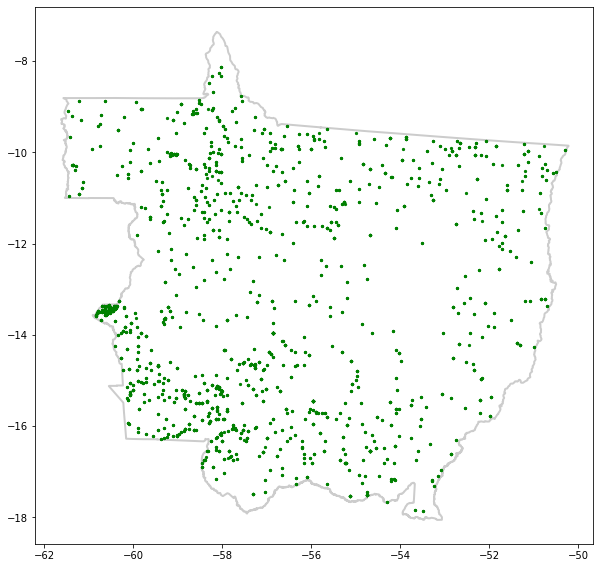

In [8]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = study_area.plot(ax=ax, linewidth=2, color='white', edgecolor='0.8')
sampling_points.plot(ax=ax, markersize=5, color='green');

In [9]:
# print the data crs
print(sampling_points.crs), print(study_area.crs)

epsg:4326
epsg:4326


(None, None)

Reproject all data to the projected crs

In [10]:
#reproject th bounday shapefile
pro_boundary = study_area.to_crs(epsg=projected_crs)
print(pro_boundary.crs)

epsg:32721


In [11]:
#reproject the sampling points shapefiles
pro_sampling_points = sampling_points.to_crs(epsg=projected_crs)
print(pro_sampling_points.crs)

epsg:32721


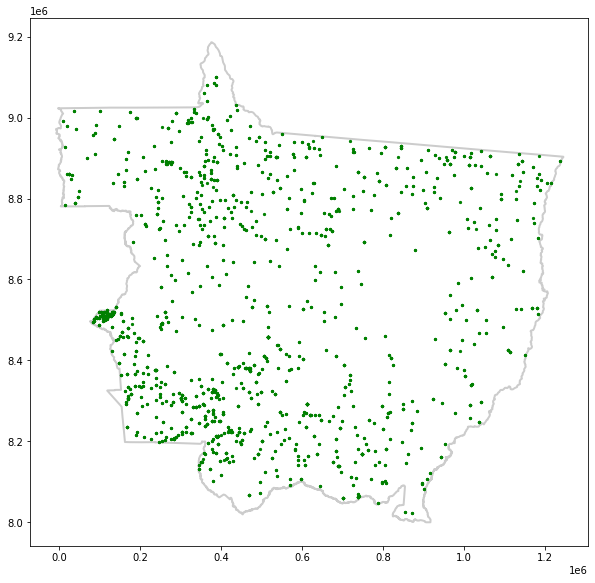

In [12]:
#plot reprojected raster
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = pro_boundary.plot(ax=ax, linewidth=2, color='white', edgecolor='0.8')
pro_sampling_points.plot(ax=ax, markersize=5, color='green');

### Exploratory Data Analysis

Now lets explore our dataset, we will check for missing value, plor our data and also check the correlation between the dataset

In [13]:
# read the dataset to view the addeded columns
sampling_points.head()

,ID,SOC_t_ha,Slope,Rainfall,NDVI,landuse,elevation,BSI,LST,Estimated,geometry
0,0,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
1,1,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
2,2,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
3,3,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
4,4,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)


In [14]:
#check that there is no no data values in the dataset
print(sampling_points.head().isnull().sum())

ID           0
SOC_t_ha     0
Slope        0
Rainfall     0
NDVI         0
landuse      0
elevation    0
BSI          0
LST          0
Estimated    0
geometry     0
dtype: int64


In [15]:
# # read the dataset to view the addeded columns
# sampling_points = sampling_points[['SOC_gkg','Slope','elevation','landuse', 'Rainfall','NDVI','BSI','Average_LS','geometry']]
# sampling_points.head()

In [16]:
sampling_points_2 = sampling_points[sampling_points.SOC_t_ha>0]
sampling_points_2  = sampling_points_2.drop(columns=['ID','Estimated'],axis=1)
sampling_points_2.describe()

,SOC_t_ha,Slope,Rainfall,NDVI,landuse,elevation,BSI,LST
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,104.343610,-126.095622,-206.352714,-237.756014,24.131129,305.339236,-238.425881,83.599136
std,21.536551,1120.581118,1436.495030,1525.683702,17.437512,135.518218,1525.579003,1479.035289
min,2.905550,-9999.000000,-9999.000000,-9999.000000,10.000000,97.000000,-9999.000000,-9999.000000
25%,89.552400,0.315521,3.094040,0.480265,10.000000,211.000000,-0.250758,296.730000
50%,107.542000,0.697759,4.056060,0.603652,28.500700,281.000000,-0.048387,300.268000
75%,116.940000,1.197840,5.433600,0.762518,30.000000,372.000000,0.068142,303.876000
max,186.116000,15.156300,6.427360,0.884135,90.000000,864.000000,0.272422,314.075556


The correlation map generated from my dataset showed that there is a strong positive correlation between the label and land use pattern, meaning that land use is a strong predictor of the label variable. The map also showed a high inverse correlation between elevation data and land use data, meaning that certain land use patterns are associated with different elevations. Additionally, there is a negative correlation between slope and elevation, indicating that areas with high slopes are likely to have lower elevations.

<AxesSubplot:>

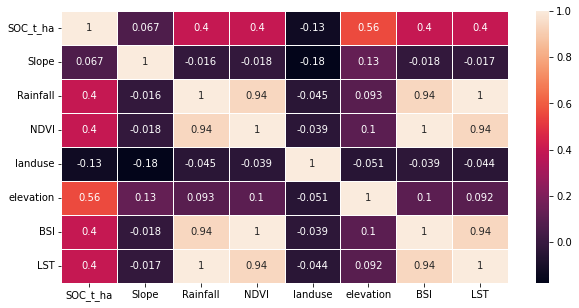

In [17]:
# show the correlation matric for the dataset
corrMatrix = sampling_points_2.corr()
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

In [18]:
print(corrMatrix)

           SOC_t_ha     Slope  Rainfall      NDVI   landuse  elevation  \
SOC_t_ha   1.000000  0.066705  0.397843  0.397529 -0.127971   0.555792   
Slope      0.066705  1.000000 -0.016485 -0.017674 -0.176722   0.126992   
Rainfall   0.397843 -0.016485  1.000000  0.938526 -0.045019   0.093125   
NDVI       0.397529 -0.017674  0.938526  1.000000 -0.038865   0.099627   
landuse   -0.127971 -0.176722 -0.045019 -0.038865  1.000000  -0.051004   
elevation  0.555792  0.126992  0.093125  0.099627 -0.051004   1.000000   
BSI        0.397517 -0.017678  0.938526  1.000000 -0.038755   0.099661   
LST        0.396180 -0.016827  0.999993  0.938519 -0.043952   0.092220   

                BSI       LST  
SOC_t_ha   0.397517  0.396180  
Slope     -0.017678 -0.016827  
Rainfall   0.938526  0.999993  
NDVI       1.000000  0.938519  
landuse   -0.038755 -0.043952  
elevation  0.099661  0.092220  
BSI        1.000000  0.938519  
LST        0.938519  1.000000  


### OLS

In [54]:
import statsmodels.formula.api as smf
# Define the dependent variable that needs to be predicted (labels)
y = sampling_points["SOC_t_ha"].values

# Define the independent variables. Let's also drop geometry and label
x = sampling_points.drop(labels=["SOC_t_ha", "geometry", "ID", "Estimated"], axis=1)
features_list = list(x.columns)  # List features so we can rank their importance later

# Fit the model
model = smf.ols(formula="SOC_t_ha ~ " + " + ".join(features_list), data=sampling_points)
results = model.fit()

# Model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               SOC_t_ha   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     901.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -10824.
No. Observations:                2607   AIC:                         2.166e+04
Df Residuals:                    2599   BIC:                         2.171e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    482.1253     19.456     24.780      0.0

In [ ]:
sns.pairplot(sampling_points_2)

<AxesSubplot:>

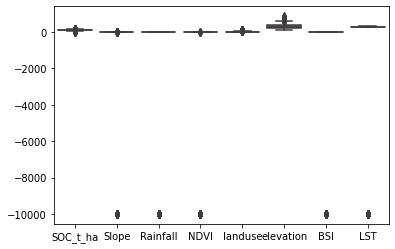

In [55]:
sns.boxplot(sampling_points_2)

In [38]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data2 = scaler.fit_transform(sampling_points_2.drop(['geometry','ID'], axis=1))
# data2

In [39]:
# df1 = pd.DataFrame(data=data2, columns=['SOC_t_hag','Slope','elevation','landuse', 'Rainfall','NDVI','BSI','LST','Estimated'])
# df1.head()

In [40]:
# # show the correlation matric for the dataset
# corrMatrix = df1.corr()
# fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
# #sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
# sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)


###  MACHINE LEARNING MODEL

* import the ML libaries
* split the data into dependent and independent variable
* splitt the dataset into training and test test
* Build our model uisng Random Forest Machine Learning Algorithm
* Check the accureacy of our model uisng differernt accracy metrics
* Plot the Predicted data

In [53]:
# import require libaries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [44]:
#load the dataset 
sampling_points.head()

,ID,SOC_t_ha,Slope,Rainfall,NDVI,landuse,elevation,BSI,LST,Estimated,geometry
0,0,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
1,1,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
2,2,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
3,3,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)
4,4,117.179,2.5858,4.21154,0.52545,30.0,468.0,0.028501,298.908,118.595358,POINT (-52.80306 -14.51194)


In [45]:
# Define the dependent variable that needs to be predicted (labels)
y = sampling_points["SOC_t_ha"].values

# Define the independent variables. Let's also drop gemotry and label
x = sampling_points.drop(labels = ["SOC_t_ha", "geometry",'ID','Estimated'], axis=1) 
features_list = list(x.columns)  #List features so we can rank their importance later 

In [46]:
import random
random.seed(42)
#Split data into train (60 %), validate (20 %) and test (20%) to verify accuracy after fitting the model.
# training data is used to train the model
# validation data is used for hyperparameter tuning
# testing data is used to test the model

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

#### RANDOM FOREST REGRESSION

In [47]:
# instantiate the Random Forest Model
model = RandomForestRegressor(n_estimators =1000, random_state = 42)

# Train the model on training data
model.fit(X_train, y_train)

# make prediction for the test dataset.
prediction = model.predict(X_test)

# The prediction SOC value
prediction[:10]

array([114.2643358, 117.5345288,  81.8648954,  68.4568023,  79.1897007,
       137.823338 , 117.5345288,  95.0761048,  90.2293748,  93.3177985])

In [48]:
y_test[:10]

array([114.421 , 117.691 ,  81.8049,  61.033 ,  78.8382, 137.872 ,
       117.691 ,  90.9304,  88.974 ,  93.1147])

In [49]:
model.score(X_test,y_test)

0.9170101678954412

#### Metric Evaluation

R2

In [ ]:
r2_score(y_test,prediction)

RMSE

MAE

In [32]:
mae = mean_absolute_error(y_test,prediction)
mae

4.044441675525555

Features Importance

LST          0.319904
Rainfall     0.288690
elevation    0.262031
Slope        0.057116
NDVI         0.029349
BSI          0.027067
landuse      0.015844
dtype: float64


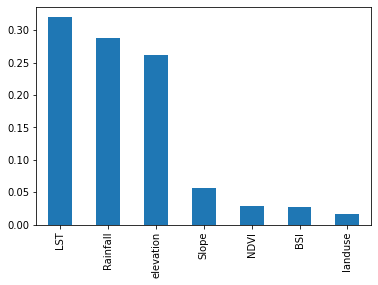

In [33]:
# Estimate the feature importance
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

# Plot the feature importance 
feature_imp.plot.bar();

Regression Accuracy

In [34]:
# Calculate the accuracy score
accuracy = r2_score(y_test, prediction)

# Print the accuracy as a percentage
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 91.70%


### Evaluation of the results – include accuracy,feature importance and Accuracy 

The results of the feature importance analysis can help to identify the most important predictors in the model, which could be useful in guiding further research or decision-making. Additionally, the high accuracy of the model suggests that it may be a useful tool for predicting the target variable in other datasets.

In [35]:
predictive_points = gpd.read_file('matto_grosso_data/predictive_dataaset_label.shp')
# predictive_points = predictive_points[(predictive_points.NDVI > 0) 
#                                       &(predictive_points.elevation > 0)
#                                       &(predictive_points.Slope > 0)
#                                      &(predictive_points.Average_LS > 0)
#                                      &(predictive_points.landuse > 0)
#                                      &(predictive_points.BSI > 0)]
predictive_points.head()

,Slope,Rainfall,NDVI,landuse,elevation,BSI,Average_LS,geometry
0,0.662234,3.01569,0.446756,30.0000,254.000,0.120537,300.588889,POINT (163156.332 8203467.115)
1,0.608627,3.01569,0.463615,30.0000,275.000,0.096819,303.490000,POINT (168156.332 8203467.115)
2,0.778892,3.04634,0.561294,23.9639,292.345,0.024005,303.117500,POINT (173156.332 8203467.115)
3,0.368167,3.10956,0.460890,90.0000,243.000,0.106112,300.880000,POINT (178156.332 8203467.115)
4,1.046340,3.05168,0.481427,30.0000,266.000,0.089576,304.490000,POINT (183156.332 8203467.115)


In [36]:
# we need to remove all the columns except the predictive features
predicitve_data = predictive_points.drop(labels = ["geometry"], axis=1)
predicitve_data.describe()

,Slope,Rainfall,NDVI,landuse,elevation,BSI,Average_LS
count,36258.000000,36258.000000,36258.000000,36258.000000,36258.000000,36258.000000,36258.000000
mean,-151.803072,-11.079523,-17.846079,15.625921,326.110689,-18.840230,273.478573
std,1226.634653,396.332598,429.461155,252.824271,346.042381,432.617106,512.455513
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.360256,3.878362,0.487808,10.000000,238.000000,-0.289091,295.675139
50%,0.722496,4.715525,0.630057,10.000000,322.000000,-0.055678,298.570714
75%,1.176125,5.591737,0.809187,30.000000,402.000000,0.079816,302.180000
max,18.183900,6.875350,0.910371,90.000000,1039.000000,0.334742,319.260000


### Finally, run the model the untrained data

In [56]:
# predict if the so values at various locations
soc_prediction = model.predict(predicitve_data) 

ValueError: shapes (2607,8) and (36258,7) not aligned: 8 (dim 1) != 36258 (dim 0)

In [ ]:
# We need to add the value coressponding to each point
predictive_points['soc_prediction']= soc_prediction [:]

In [ ]:
predictive_points.head()

In [ ]:
predictive_points.describe()

In [ ]:
predictive_points.plot()

In [ ]:
predictive_points.to_csv('predicted_data.csv', index = False)

Generate the Raster data showing of soc distribution

In [ ]:
# Converting the point shapefile to raster.
# We will use the model prediction (column flood_probability in predictive_points to make a raster)
from geocube.api.core import make_geocube
import rasterio as rio

grid_data = make_geocube(vector_data=predictive_points_pro, measurements=["flood_probability"],interpolate_na_method='linear', resolution=(-30, 30))
grid_data["flood_probability"].rio.to_raster("Flood_susceptibility.tif")

In [ ]:
# you can save the flood prediction data if you want
predictive_points.to_file('soc_pred.geojson', driver="GeoJSON")


Hatarilabs. (2020, January 15). How to reproject single and multiple rasters with Python and Rasterio [Tutorial]. February 25, 2023, from https://hatarilabs.com/ih-en/how-to-reproject-single-and-multiple-rasters-with-python-and-rasterio-tutorial

Towards urban flood susceptibility mapping using machine and deep learning models [Blog post]. Hydroinformatics. Retrieved September 15, 2021, from https://medium.com/hydroinformatics/towards-urban-flood-susceptibility-mapping-using-machine-and-deep-learning-models-3-random-9fe4e1279f3b